In [1]:
import numpy as np
import pandas as pd

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#現在の最大表示列数の出力
pd.get_option("display.max_columns")

#最大表示列数の指定（ここでは50列を指定）
pd.set_option('display.max_columns', 122)

#現在の最大表示行数の出力
pd.get_option("display.max_rows")

#最大表示行数の指定（ここでは50行を指定）
pd.set_option('display.max_rows', 130)

### 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、\
以下の観点からレポートしてください。


- 1. Home Creditはどのような企業？
- 2. このコンペティションでは何を予測する？
- 3. それを予測することで企業が得られるメリットは何？

- 1. Home Creditはどのような企業？

Founded in 1997, Home Credit is an international consumer finance provider with operations in 9 countries.
We focus on responsible lending primarily to people with little or no credit history.
Our services are simple, easy and fast.

1997年に設立されたHome Creditは９カ国で運営されている国際的な消費者金融会社です。当社は、信用状況報告の無い、又は、少ない人向けの融資に焦点を当てています。当社のサービスはシンプルで簡単、そして迅速です。

- 2.このコンペティションでは何を予測する？

返済能力の予測

- 3.それを予測することで企業が得られるメリットは何？

貸し倒れのリスクの回避など

### 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。


- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す

それぞれ結果に対する説明や考察も行ってください。

In [3]:
app_train = pd.read_csv('application_train.csv')

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
app_train.shape

(307511, 122)

In [8]:
app_train.isnull().any()

SK_ID_CURR                      False
TARGET                          False
NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                    False
AMT_INCOME_TOTAL                False
AMT_CREDIT                      False
AMT_ANNUITY                      True
AMT_GOODS_PRICE                  True
NAME_TYPE_SUITE                  True
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
NAME_FAMILY_STATUS              False
NAME_HOUSING_TYPE               False
REGION_POPULATION_RELATIVE      False
DAYS_BIRTH                      False
DAYS_EMPLOYED                   False
DAYS_REGISTRATION               False
DAYS_ID_PUBLISH                 False
OWN_CAR_AGE                      True
FLAG_MOBIL                      False
FLAG_EMP_PHONE                  False
FLAG_WORK_PHONE                 False
FLAG_CONT_MOBILE                False
FLAG_PHONE  

欠損値の外観を把握

<AxesSubplot:>

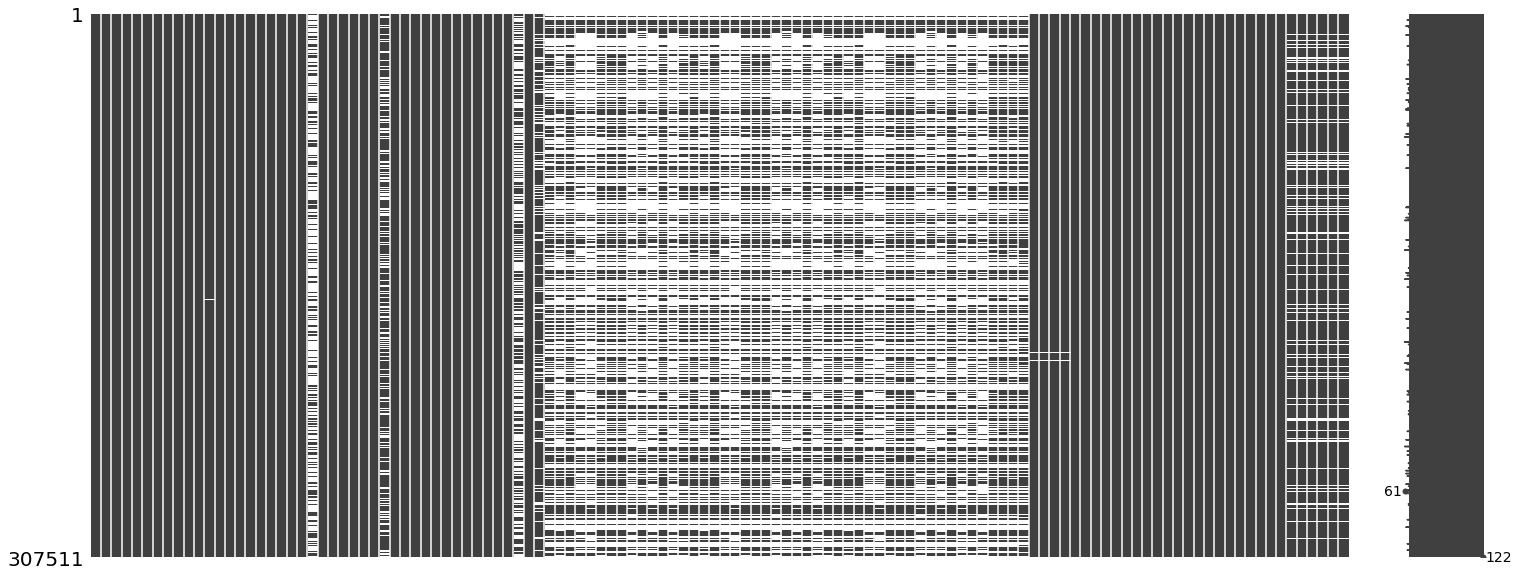

In [9]:
msno.matrix(app_train)

欠損値の割合を把握

In [10]:
pd.options.display.float_format = '{: <10.2%}'.format
total = app_train.isnull().sum().sort_values(ascending=False)
percent = (app_train.isnull().sum()/app_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(sum(total > 0))

,Total,Percent
COMMONAREA_MEDI,214865,69.87%
COMMONAREA_AVG,214865,69.87%
COMMONAREA_MODE,214865,69.87%
NONLIVINGAPARTMENTS_MODE,213514,69.43%
NONLIVINGAPARTMENTS_MEDI,213514,69.43%
NONLIVINGAPARTMENTS_AVG,213514,69.43%
FONDKAPREMONT_MODE,210295,68.39%
LIVINGAPARTMENTS_MEDI,210199,68.35%
LIVINGAPARTMENTS_MODE,210199,68.35%
LIVINGAPARTMENTS_AVG,210199,68.35%


In [11]:
pd.reset_option('display.float_format')

目的変数('TARGET')の要素の頻度及びカウントプロットを表示

In [12]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:xlabel='TARGET', ylabel='count'>

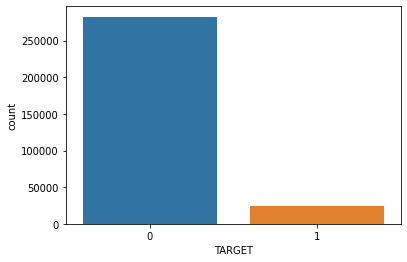

In [13]:
sns.countplot(x='TARGET', data=app_train)

### 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

《相関の強さ》\
\begin{eqnarray}
0.7 ～ 1.0　&=& \mbox{かなり強い正の相関がある}\\
0.4 ～ 0.7　&=& \mbox{正の相関がある}\\
0.2 ～ 0.4　&=& \mbox{弱い正の相関がある}\\
－0.2 ～ 0 ～ 0.2　&=& \mbox{ほとんど相関がない}\\
－0.4 ～ －0.2　&=& \mbox{弱い負の相関がある}\\
－0.7 ～ －0.4　&=& \mbox{負の相関がある}\\
－1.0 ～ －0.7　&=& \mbox{かなり強い負の相関がある}\\
\end{eqnarray}

- TARGET変数と特徴量間で「ほとんど相関がない」
- 相関性に焦点を当てたデータ探索が困難
- コンペでは「返済能力の予測」が課題
- どのような人であれば融資するかを検討
 1. 年齢
     1. 年齢の増加と収入・金融資産の増加の関係性
 2. 収入
 3. 職業
 4. 性別
 5. 家族
 6. 住宅・車両・金融資産の保有状況(担保になりうる)
 7. 学歴
 8. ローン完済年

### 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

121列ある特徴量を約40列ごとに分割して、TARGET変数と結合した上で相関性を把握

In [14]:
features = app_train.loc[:, app_train.columns != 'TARGET']
target = app_train.loc[:, app_train.columns == 'TARGET']

features_corr_1 = app_train.iloc[:, :40]
features_corr_2 = app_train.iloc[:, 40:80]
features_corr_3 = app_train.iloc[:, 80:121]

features_corr_1 = pd.concat([target, features_corr_1], axis=1)
features_corr_2 = pd.concat([target, features_corr_2], axis=1)
features_corr_3 = pd.concat([target, features_corr_3], axis=1)

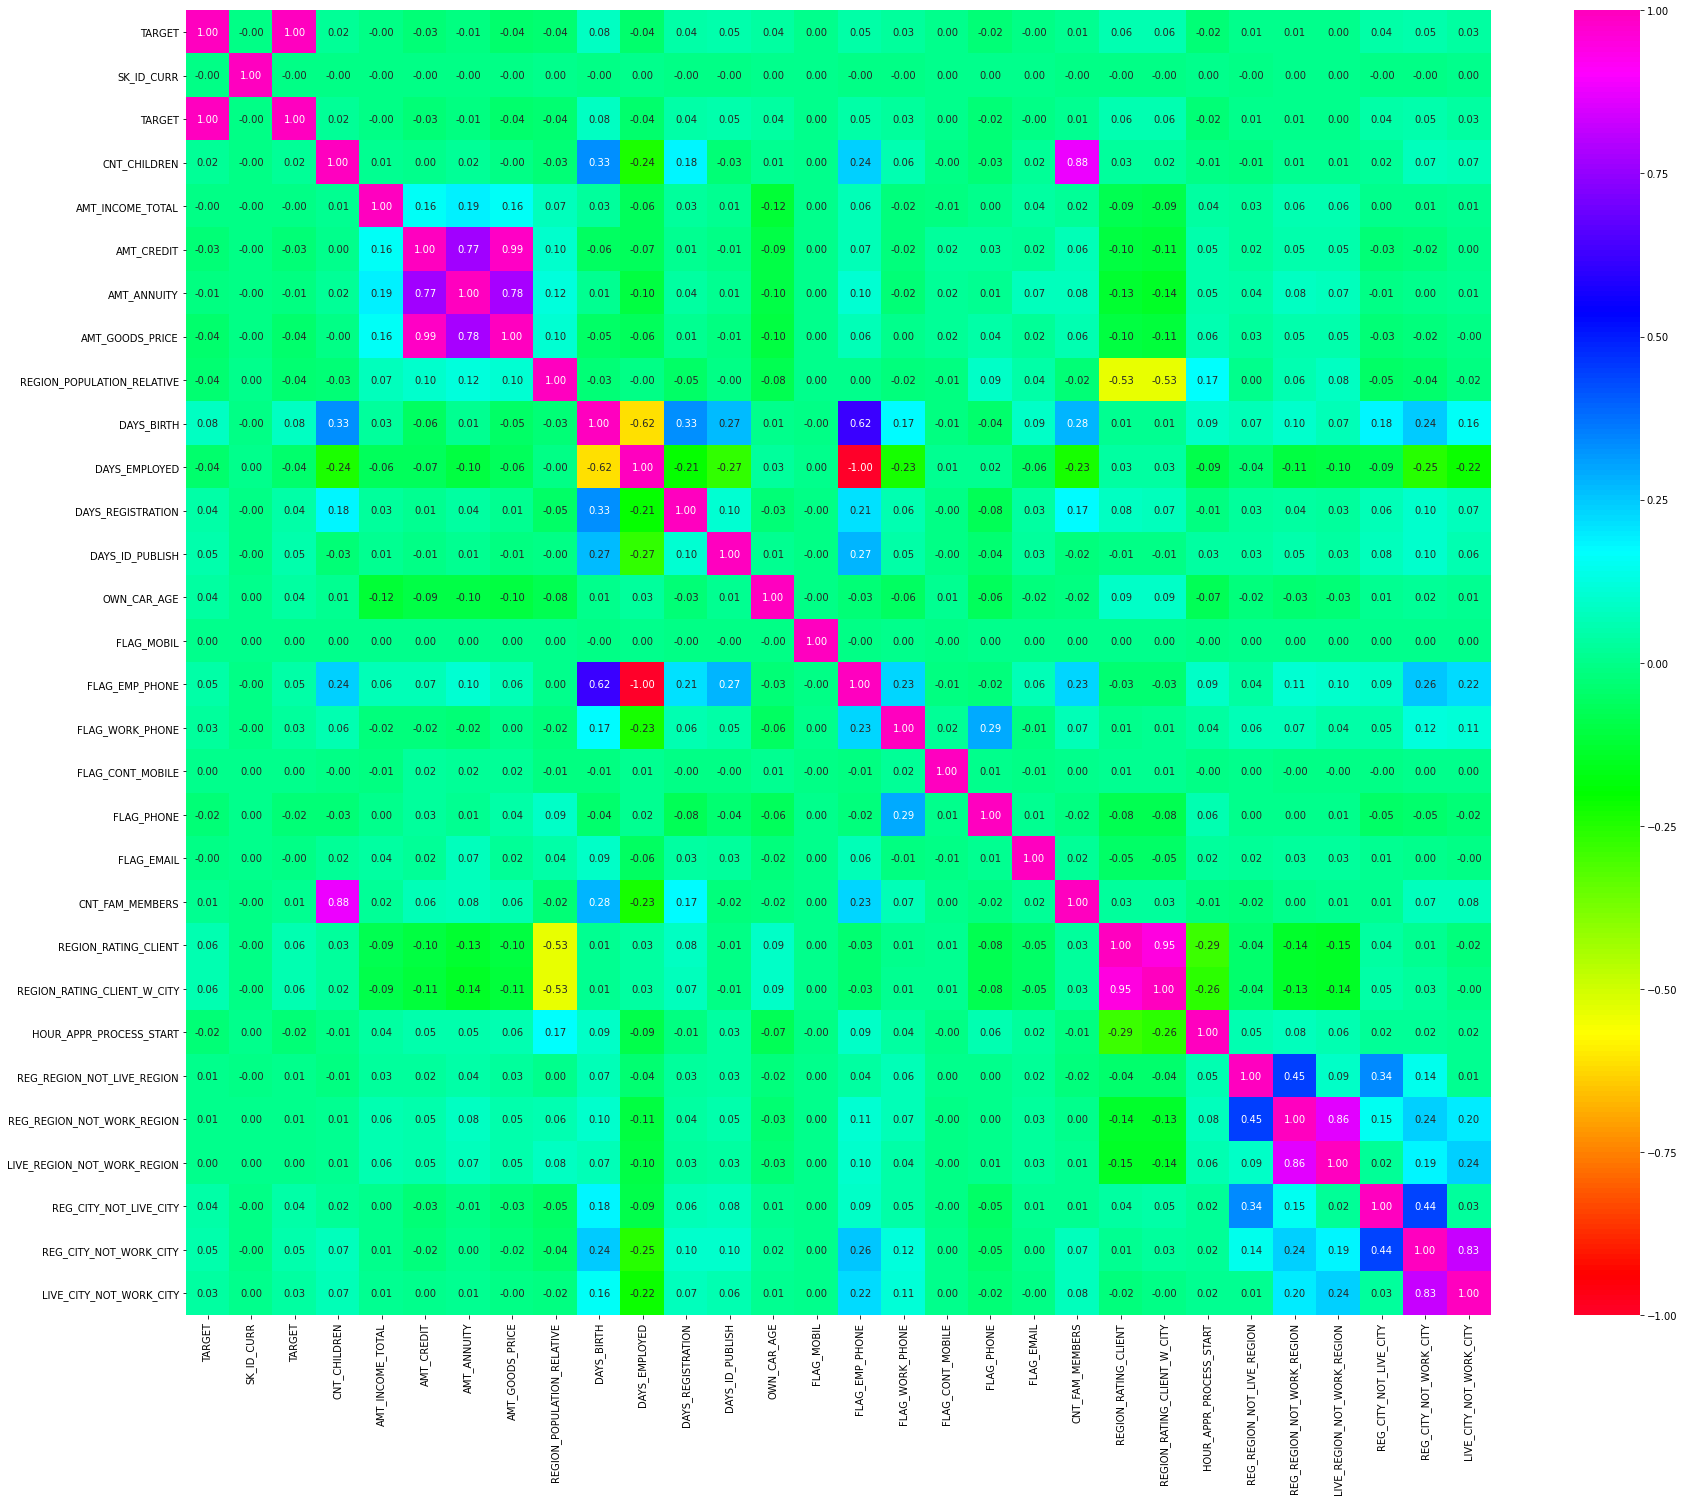

In [15]:
plt.figure(figsize=(30, 24)) 
sns.heatmap(features_corr_1.corr(), annot=True, square=True, fmt='.2f', cmap='gist_rainbow', vmin=-1, vmax=1)
plt.show()

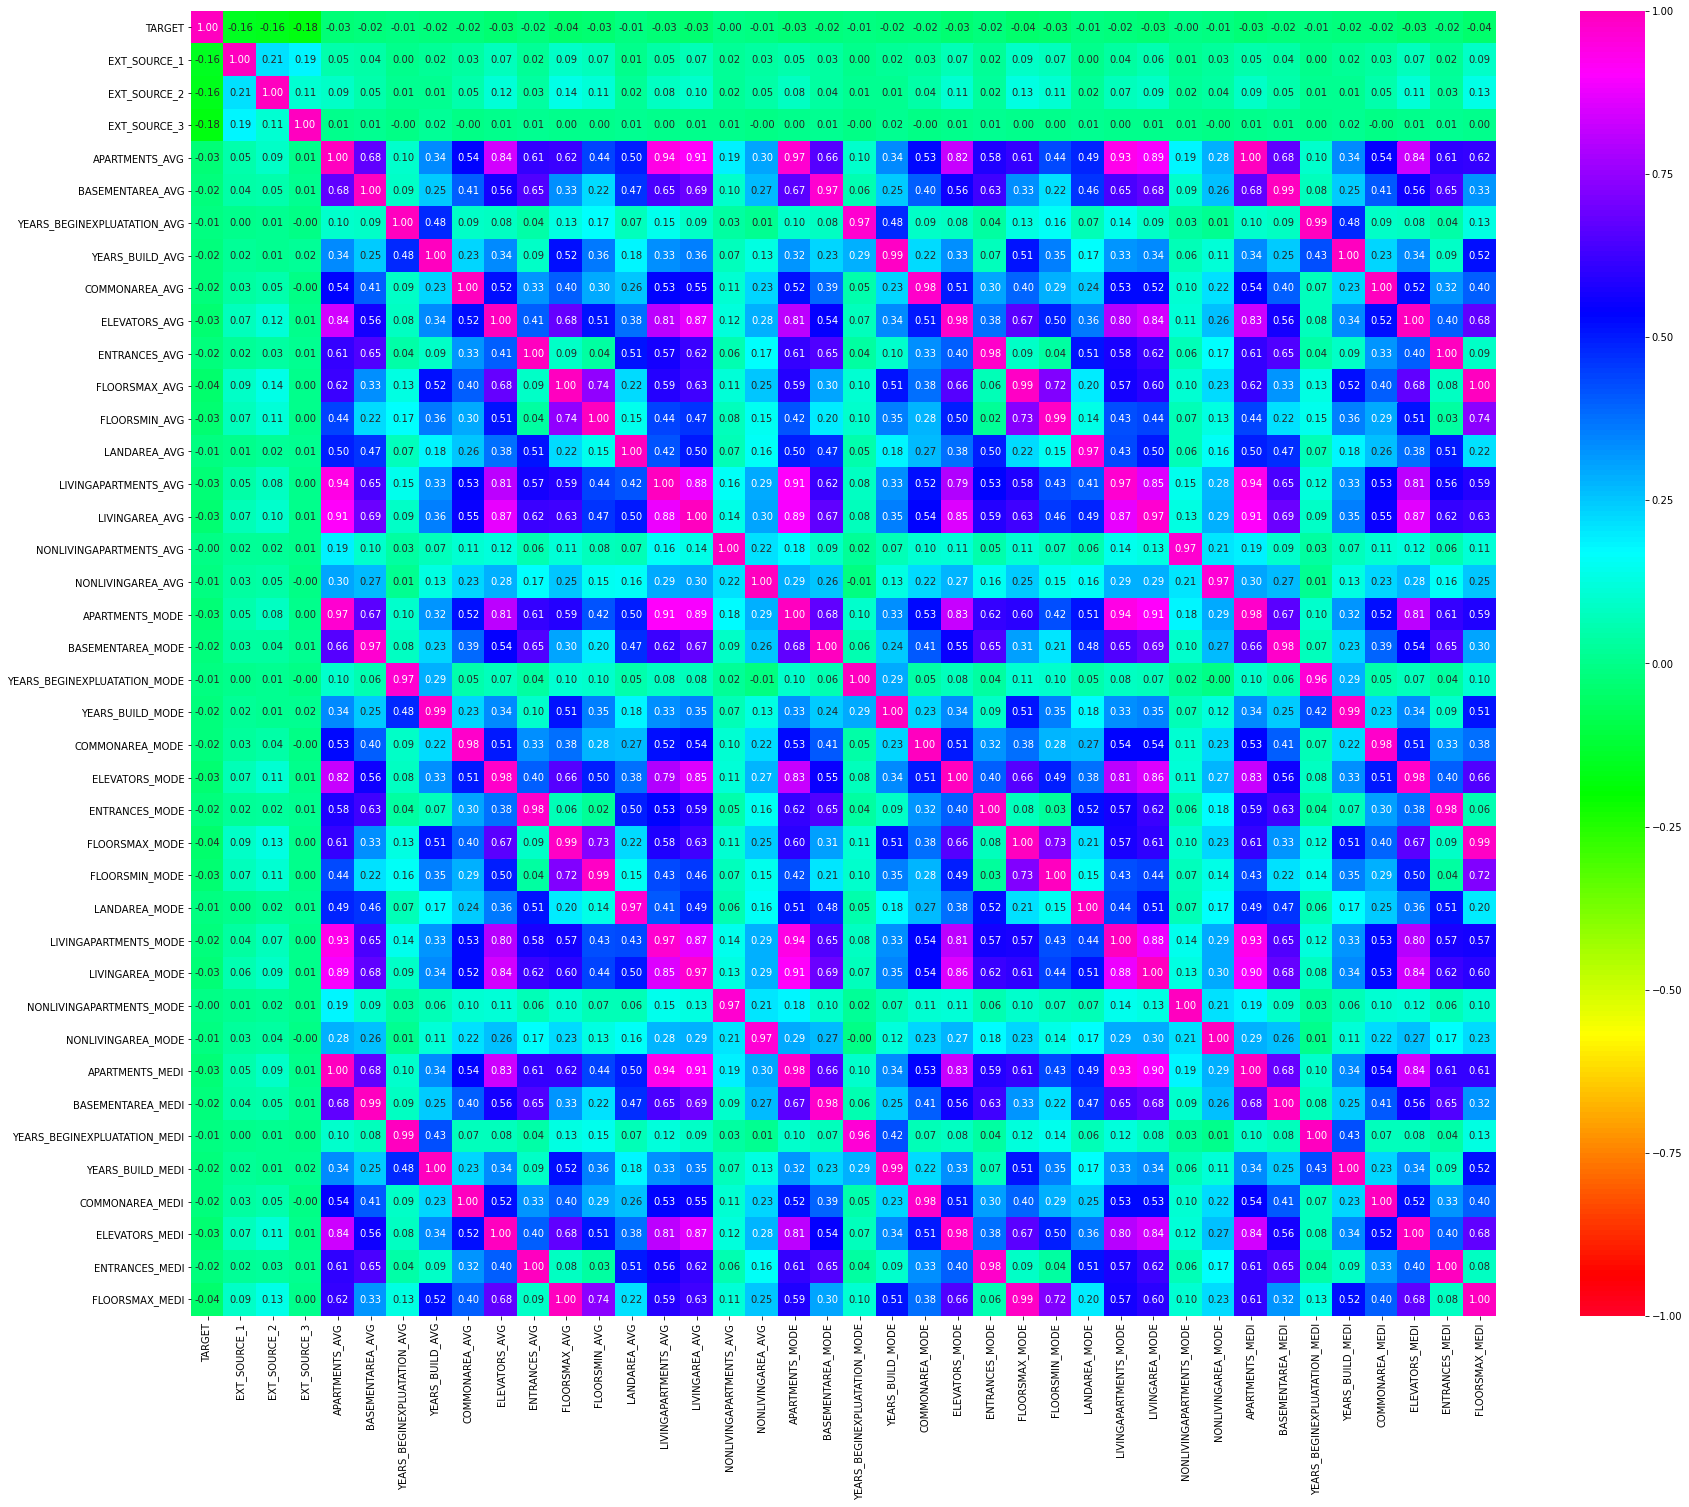

In [16]:
plt.figure(figsize=(30, 24)) 
sns.heatmap(features_corr_2.corr(), annot=True, square=True, fmt='.2f', cmap='gist_rainbow', vmin=-1, vmax=1)
plt.show()

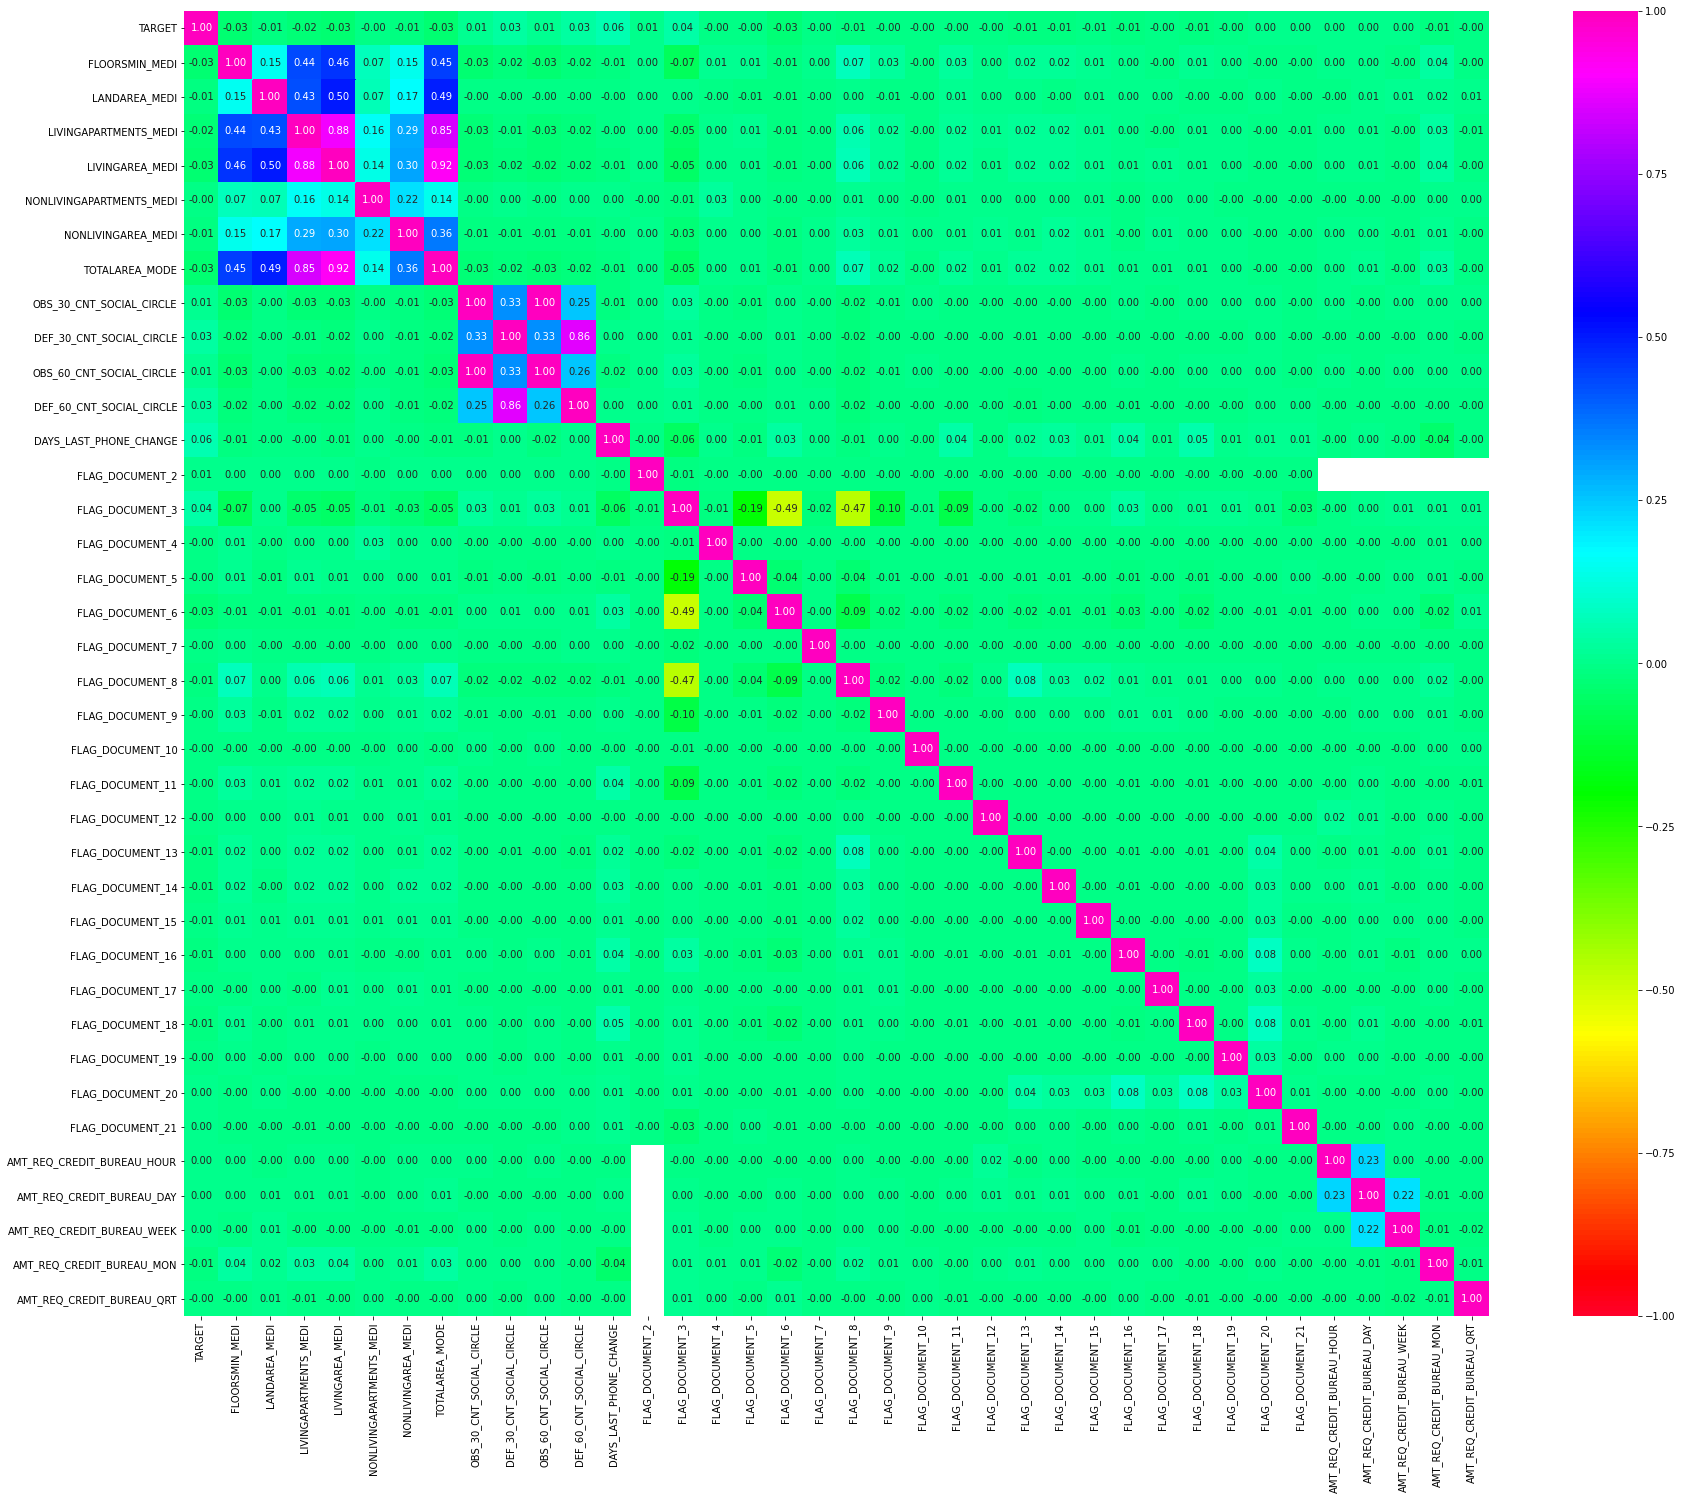

In [17]:
plt.figure(figsize=(30, 24)) 
sns.heatmap(features_corr_3.corr(), annot=True, square=True, fmt='.2f', cmap='gist_rainbow', vmin=-1, vmax=1)
plt.show()

- __<u>年齢</u>__

In [18]:
app_train['DAYS_BIRTH_YEAR'] = (app_train['DAYS_BIRTH'] // 365).abs()

age_ctgr_list = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
age_ctgr_name = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70']
 
app_train['DAYS_BIRTH_CTGR'] = pd.cut(app_train['DAYS_BIRTH_YEAR'], bins=age_ctgr_list, labels=age_ctgr_name)

<AxesSubplot:xlabel='DAYS_BIRTH_CTGR', ylabel='count'>

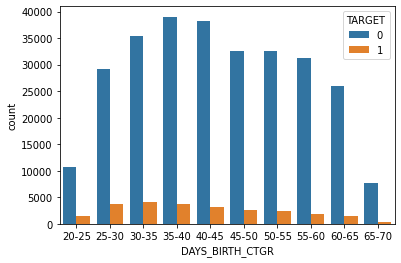

In [19]:
sns.countplot(x='DAYS_BIRTH_CTGR', hue='TARGET', data=app_train)

年齢を５歳毎に区切り、TARGET別のデータ件数を確認

<AxesSubplot:>

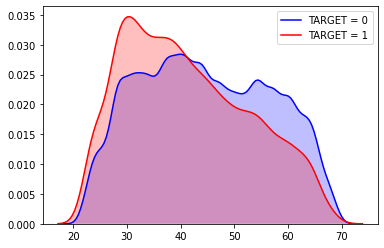

In [20]:
sns.kdeplot(app_train['DAYS_BIRTH_YEAR'][app_train['TARGET'] == 0], shade=True, color="b", label='TARGET = 0')
sns.kdeplot(app_train['DAYS_BIRTH_YEAR'][app_train['TARGET'] == 1], shade=True, color="r", label='TARGET = 1')

1. 若年層に返済が困難になる者が多い傾向あり
2. 年齢が上がるにつれて返済が困難になる者が減少する傾向あり
3. 上記2.の要因として、年齢の増加と収入・金融資産の増加の関係性を指摘する

- __<u>収入</u>__

1. 'AMT_INCOME_TOTAL'は、年収を管理する列になっていないようである(年収にしては高額)。
2. 'AMT_INCOME_TOTAL'を'AMT_CREDIT'や''DAYS_BIRTH'で割り、TARGET変数との関連性を探る。

In [21]:
app_train['AMT_INCOME_TOTAL_IN_DAYS_BIRTH'] = app_train['AMT_INCOME_TOTAL'] / app_train['DAYS_BIRTH'].abs()
app_train['AMT_INCOME_TOTAL_IN_AMT_CREDIT'] = app_train['AMT_INCOME_TOTAL'] / app_train['AMT_CREDIT']

In [22]:
app_train['AMT_INCOME_TOTAL_IN_DAYS_BIRTH'].describe()

count    307511.000000
mean         11.457546
std          18.590852
min           1.091880
25%           6.562382
50%           9.805346
75%          14.271948
max        9274.673008
Name: AMT_INCOME_TOTAL_IN_DAYS_BIRTH, dtype: float64

In [23]:
income_analysis = pd.concat([target, app_train['AMT_INCOME_TOTAL_IN_DAYS_BIRTH'],app_train['AMT_INCOME_TOTAL_IN_AMT_CREDIT']], axis=1)

In [24]:
#外れ値の削除
for inx in income_analysis['AMT_INCOME_TOTAL_IN_DAYS_BIRTH'][income_analysis['AMT_INCOME_TOTAL_IN_DAYS_BIRTH'] > 26].index:
    income_analysis.drop(index=inx, inplace=True)

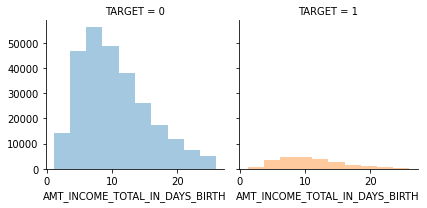

In [25]:
grid = sns.FacetGrid(income_analysis, col='TARGET', hue='TARGET', col_wrap=2)
grid.map(sns.distplot, 'AMT_INCOME_TOTAL_IN_DAYS_BIRTH', bins=10, kde=False)
plt.show()

<AxesSubplot:>

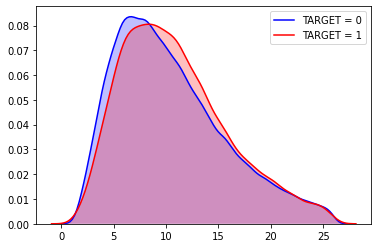

In [26]:
sns.kdeplot(income_analysis['AMT_INCOME_TOTAL_IN_DAYS_BIRTH'][income_analysis['TARGET'] == 0], shade=True, color="b", label='TARGET = 0')
sns.kdeplot(income_analysis['AMT_INCOME_TOTAL_IN_DAYS_BIRTH'][income_analysis['TARGET'] == 1], shade=True, color="r", label='TARGET = 1')

In [27]:
#外れ値の削除
for inx in income_analysis['AMT_INCOME_TOTAL_IN_AMT_CREDIT'][income_analysis['AMT_INCOME_TOTAL_IN_AMT_CREDIT'] > 1].index:
    income_analysis.drop(index=inx, inplace=True)

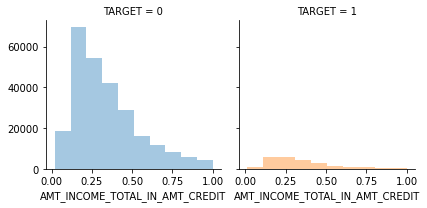

In [28]:
grid = sns.FacetGrid(income_analysis, col='TARGET', hue='TARGET', col_wrap=2)
grid.map(sns.distplot, 'AMT_INCOME_TOTAL_IN_AMT_CREDIT', bins=10, kde=False)
plt.show()

<AxesSubplot:>

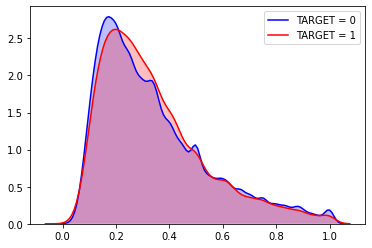

In [29]:
sns.kdeplot(income_analysis['AMT_INCOME_TOTAL_IN_AMT_CREDIT'][income_analysis['TARGET'] == 0], shade=True, color="b", label='TARGET = 0')
sns.kdeplot(income_analysis['AMT_INCOME_TOTAL_IN_AMT_CREDIT'][income_analysis['TARGET'] == 1], shade=True, color="r", label='TARGET = 1')

収入の当該指標値の高低差と返済の困難性は余り関係がなさそうである。

- __<u>職業</u>__

In [30]:
pd.DataFrame(app_train.groupby(['OCCUPATION_TYPE', 'TARGET'])['SK_ID_CURR'].count())

SK_ID_CURR
OCCUPATION_TYPE       TARGET            
Accountants           0             9339
                      1              474
Cleaning staff        0             4206
                      1              447
Cooking staff         0             5325
                      1              621
Core staff            0            25832
                      1             1738
Drivers               0            16496
                      1             2107
HR staff              0              527
                      1               36
High skill tech staff 0            10679
                      1              701
IT staff              0              492
                      1               34
Laborers              0            49348
                      1             5838
Low-skill Laborers    0             1734
                      1              359
Managers              0            20043
                      1             1328
Medicine staff        0             7965
                      1              572
Private service staff 0             2477
                      1              175
Realty agents         0              692
                      1               59
Sales staff           0            29010
                      1             3092
Secretaries           0             1213
                      1               92
Security staff        0             5999
                      1              722
Waiters/barmen staff  0             1196
                      1              152

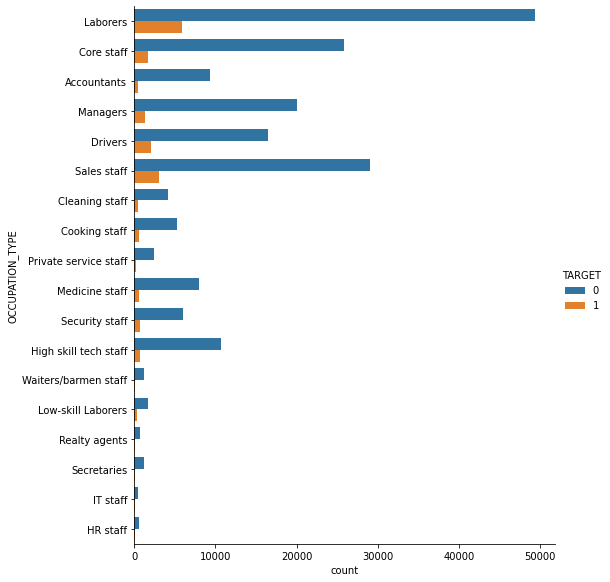

In [31]:
sns.catplot(y='OCCUPATION_TYPE', hue='TARGET', data=app_train, kind="count", height=8, aspect=1)

クライアント職業分布
1. 労働者(Laborers)
2. 販売員(Sales staff)
3. コアスタッフ(Core staff)
4. マネージャー(Managers)
5. 運転手(Drivers)

- __<u>性別</u>__

In [32]:
pd.DataFrame(app_train.groupby(['CODE_GENDER', 'TARGET'])['SK_ID_CURR'].count())

SK_ID_CURR
CODE_GENDER TARGET            
F           0           188278
            1            14170
M           0            94404
            1            10655
XNA         0                4

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

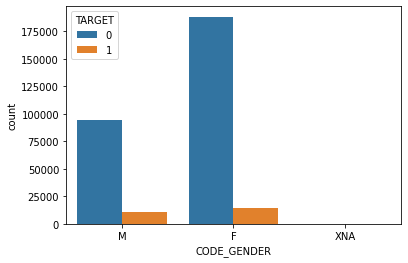

In [33]:
sns.countplot(x='CODE_GENDER', hue='TARGET', data=app_train)

男性は女性と比較して、返済が困難になる者が多い傾向あり

- __<u>家族</u>__

1. 婚姻状況

In [34]:
pd.DataFrame(app_train.groupby(['NAME_FAMILY_STATUS', 'TARGET'])['SK_ID_CURR'].count())

SK_ID_CURR
NAME_FAMILY_STATUS   TARGET            
Civil marriage       0            26814
                     1             2961
Married              0           181582
                     1            14850
Separated            0            18150
                     1             1620
Single / not married 0            40987
                     1             4457
Unknown              0                2
Widow                0            15151
                     1              937

<AxesSubplot:xlabel='count', ylabel='NAME_FAMILY_STATUS'>

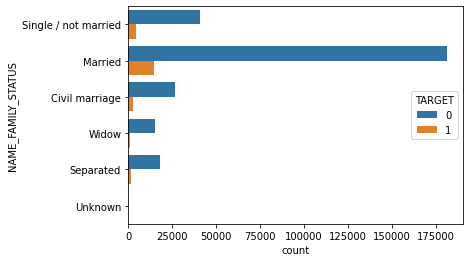

In [35]:
sns.countplot(y='NAME_FAMILY_STATUS', hue='TARGET', data=app_train)

結婚・独身などで返済の困難性に違いは見受けられないようである。

2. 子供の有無

In [36]:
pd.DataFrame(app_train.groupby(['CNT_CHILDREN', 'TARGET'])['SK_ID_CURR'].count())

SK_ID_CURR
CNT_CHILDREN TARGET            
0            0           198762
             1            16609
1            0            55665
             1             5454
2            0            24416
             1             2333
3            0             3359
             1              358
4            0              374
             1               55
5            0               77
             1                7
6            0               15
             1                6
7            0                7
8            0                2
9            1                2
10           0                2
11           1                1
12           0                2
14           0                3
19           0                2

<AxesSubplot:xlabel='count', ylabel='CNT_CHILDREN'>

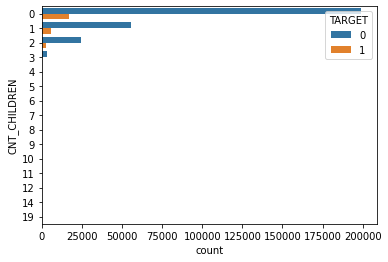

In [37]:
sns.countplot(y='CNT_CHILDREN', hue='TARGET', data=app_train)

子供の数で返済の困難性に違いは見受けられないようである。

3. 申請時の同行者

In [38]:
pd.DataFrame(app_train.groupby(['NAME_TYPE_SUITE', 'TARGET'])['SK_ID_CURR'].count())

SK_ID_CURR
NAME_TYPE_SUITE TARGET            
Children        0             3026
                1              241
Family          0            37140
                1             3009
Group of people 0              248
                1               23
Other_A         0              790
                1               76
Other_B         0             1596
                1              174
Spouse, partner 0            10475
                1              895
Unaccompanied   0           228189
                1            20337

<AxesSubplot:xlabel='count', ylabel='NAME_TYPE_SUITE'>

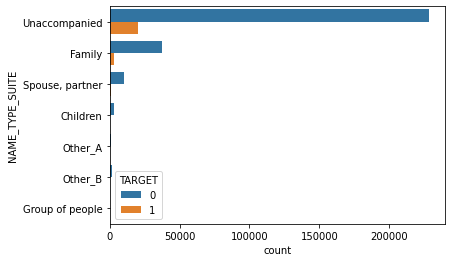

In [39]:
sns.countplot(y='NAME_TYPE_SUITE', hue='TARGET', data=app_train)

- __<u>車・不動産の所有状況</u>__

1. 車の所有状況

In [40]:
pd.DataFrame(app_train.groupby(['FLAG_OWN_CAR', 'TARGET'])['SK_ID_CURR'].count())

SK_ID_CURR
FLAG_OWN_CAR TARGET            
N            0           185675
             1            17249
Y            0            97011
             1             7576

<AxesSubplot:xlabel='FLAG_OWN_CAR', ylabel='count'>

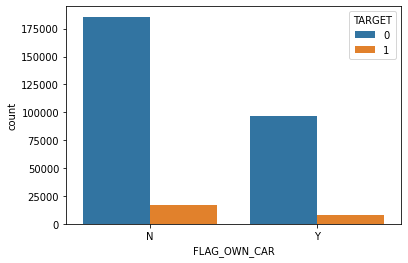

In [41]:
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=app_train)

2. 不動産の所有状況

In [42]:
pd.DataFrame(app_train.groupby(['FLAG_OWN_REALTY', 'TARGET'])['SK_ID_CURR'].count())

SK_ID_CURR
FLAG_OWN_REALTY TARGET            
N               0            86357
                1             7842
Y               0           196329
                1            16983

<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='count'>

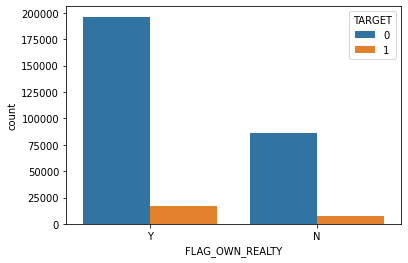

In [43]:
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=app_train)

3. 住宅のタイプ

In [44]:
pd.DataFrame(app_train.groupby(['NAME_HOUSING_TYPE', 'TARGET'])['SK_ID_CURR'].count())

SK_ID_CURR
NAME_HOUSING_TYPE   TARGET            
Co-op apartment     0             1033
                    1               89
House / apartment   0           251596
                    1            21272
Municipal apartment 0            10228
                    1              955
Office apartment    0             2445
                    1              172
Rented apartment    0             4280
                    1              601
With parents        0            13104
                    1             1736

<AxesSubplot:xlabel='count', ylabel='NAME_HOUSING_TYPE'>

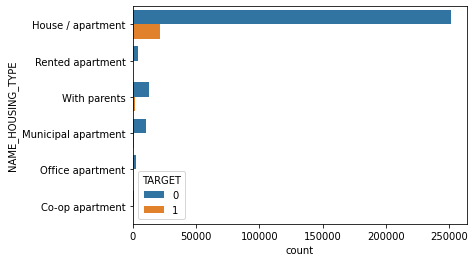

In [45]:
sns.countplot(y='NAME_HOUSING_TYPE', hue='TARGET', data=app_train)

- __<u>学歴</u>__

In [46]:
pd.DataFrame(app_train.groupby(['NAME_EDUCATION_TYPE', 'TARGET'])['SK_ID_CURR'].count())

SK_ID_CURR
NAME_EDUCATION_TYPE           TARGET            
Academic degree               0              161
                              1                3
Higher education              0            70854
                              1             4009
Incomplete higher             0             9405
                              1              872
Lower secondary               0             3399
                              1              417
Secondary / secondary special 0           198867
                              1            19524

<AxesSubplot:xlabel='count', ylabel='NAME_EDUCATION_TYPE'>

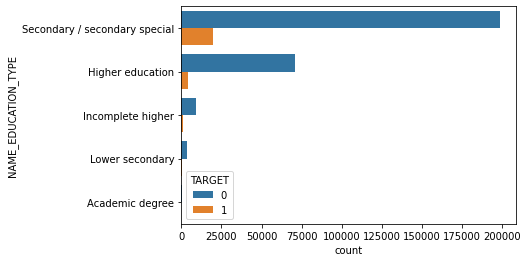

In [47]:
sns.countplot(y='NAME_EDUCATION_TYPE', hue='TARGET', data=app_train)

データ数こそ多くないものの学位(Academic degree)取得者が返済困難になるケースが少ない傾向あり

- __<u>ローン完済年</u>__

In [48]:
app_train['AMT_CREDIT_PAYOFF_YEAR'] = app_train['AMT_CREDIT'] // app_train['AMT_ANNUITY']

In [49]:
pd.DataFrame(app_train.groupby(['AMT_CREDIT_PAYOFF_YEAR', 'TARGET'])['SK_ID_CURR'].count())

SK_ID_CURR
AMT_CREDIT_PAYOFF_YEAR TARGET            
8.0                    0             4334
                       1              456
9.0                    0            14064
                       1              760
10.0                   0            14397
                       1              611
11.0                   0              968
                       1              105
12.0                   0            12473
                       1             2212
13.0                   0             6844
                       1              713
14.0                   0            11035
                       1             1496
15.0                   0             6727
                       1              521
16.0                   0             6311
                       1              875
17.0                   0            11090
                       1              424
18.0                   0            12440
                       1             1698
19.0                   0            15666
                       1             1649
20.0                   0            44950
                       1             4480
21.0                   0             6156
                       1             1033
22.0                   0             7423
                       1              444
23.0                   0            13813
                       1              745
24.0                   0             1913
                       1              141
25.0                   0            11461
                       1              792
26.0                   0             8319
                       1              512
27.0                   0             7764
                       1              598
28.0                   0             3875
                       1              410
29.0                   0              171
                       1               32
30.0                   0            16458
                       1             1362
31.0                   0             3108
                       1              208
32.0                   0             2058
                       1              137
33.0                   0             2400
                       1              109
34.0                   0            23927
                       1             1615
35.0                   0              461
                       1              100
36.0                   0             6089
                       1              297
37.0                   0             5787
                       1              275
39.0                   0              165
                       1                7
40.0                   0                7
41.0                   0                9
                       1                2
44.0                   0                6
45.0                   0                5
                       1                6

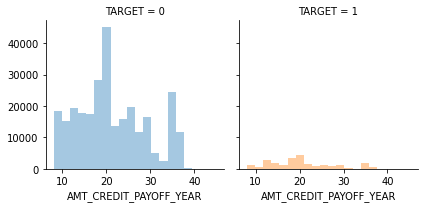

In [50]:
grid = sns.FacetGrid(app_train, col='TARGET', hue='TARGET', col_wrap=2)
grid.map(sns.distplot, 'AMT_CREDIT_PAYOFF_YEAR', bins=20, kde=False)
plt.show()

<AxesSubplot:>

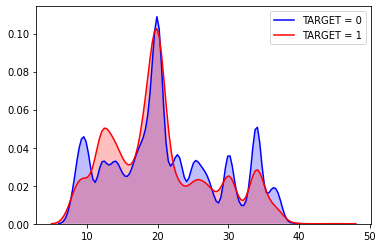

In [51]:
sns.kdeplot(app_train['AMT_CREDIT_PAYOFF_YEAR'][app_train['TARGET'] == 0], shade=True, color="b", label='TARGET = 0')
sns.kdeplot(app_train['AMT_CREDIT_PAYOFF_YEAR'][app_train['TARGET'] == 1], shade=True, color="r", label='TARGET = 1')

完済年が長い場合に返済の困難性が高くなる傾向を想定したが、傾向性は見られないようである。

### 【問題5】（アドバンス課題）Notebooksへの投稿
必須ではありませんが、コンペティションのNotebooksページに今回作成したEDAのノートブックを投稿することを推奨しています。

下記に投稿しました。\
[[DIC Assignment]EDA for practice](https://www.kaggle.com/takamotoki/dic-assignment-eda-for-practice)